In [3]:


# Import libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('olympics_08_medalists.csv')

# Check the shape and first few rows
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (1875, 71)


,medalist_name,male_archery,female_archery,male_athletics,female_athletics,male_badminton,female_badminton,male_baseball,male_basketball,female_basketball,...,female_beach volleyball,male_volleyball,female_volleyball,male_water polo,female_water polo,male_weightlifting,female_weightlifting,male_freestyle wrestling,female_freestyle wrestling,male_greco-roman wrestling
0,Aaron Armstrong,NaN,NaN,gold,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Peirsol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abdullo Tangriev,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abeer Abdelrahman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bronze,NaN,NaN,NaN
4,Abhinav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Checking all column names


In [4]:

df.columns.tolist()


['medalist_name',
 'male_archery',
 'female_archery',
 'male_athletics',
 'female_athletics',
 'male_badminton',
 'female_badminton',
 'male_baseball',
 'male_basketball',
 'female_basketball',
 'male_boxing',
 'male_canoeing and kayaking',
 'female_canoeing and kayaking',
 'male_road bicycle racing',
 'female_road bicycle racing',
 'male_track cycling',
 'female_track cycling',
 'male_mountain biking',
 'female_mountain biking',
 'male_bmx',
 'female_bmx',
 'male_diving',
 'female_diving',
 'female_equestrian sport',
 'male_equestrian sport',
 'male_fencing',
 'female_fencing',
 'male_field hockey',
 'female_field hockey',
 'male_association football',
 'female_association football',
 'male_artistic gymnastics',
 'female_artistic gymnastics',
 'female_rhythmic gymnastics',
 'male_trampoline gymnastics',
 'female_trampoline gymnastics',
 'male_handball',
 'female_handball',
 'male_judo',
 'female_judo',
 'male_modern pentathlon',
 'female_modern pentathlon',
 'male_rowing',
 'female_ro

In [5]:
# Melt the dataset so we have one row per medalist per event
melted_df = df.melt(id_vars=['medalist_name'],
                    var_name='event_gender',
                    value_name='medal')

# Drop any rows where the medal is NaN (they didn't win that event)
melted_df = melted_df.dropna(subset=['medal']).reset_index(drop=True)

# Preview melted data
melted_df.head()

,medalist_name,event_gender,medal
0,Bair Badënov,male_archery,bronze
1,Ilario Di Buò,male_archery,silver
2,Im Dong-hyun,male_archery,gold
3,Jiang Lin,male_archery,bronze
4,Lee Chang-hwan,male_archery,gold


In [6]:
# Split the event_gender into two columns: gender and sport
melted_df[['gender', 'sport']] = melted_df['event_gender'].str.split('_', n=1, expand=True)

# Optional: Clean any extra spaces or fix strings (if needed)
melted_df['sport'] = melted_df['sport'].str.replace('-', ' ').str.strip()
melted_df['gender'] = melted_df['gender'].str.strip()

In [7]:
# Reorder columns for readability
tidy_df = melted_df[['medalist_name', 'gender', 'sport', 'medal']]

# Preview the final tidy dataset
tidy_df.head()

,medalist_name,gender,sport,medal
0,Bair Badënov,male,archery,bronze
1,Ilario Di Buò,male,archery,silver
2,Im Dong-hyun,male,archery,gold
3,Jiang Lin,male,archery,bronze
4,Lee Chang-hwan,male,archery,gold


In [8]:
# Pivot table: Count of medals by sport
sport_pivot = tidy_df.pivot_table(index='sport',
                                  values='medal',
                                  aggfunc='count').reset_index()

# Rename for clarity
sport_pivot.columns = ['Sport', 'Medal_Count']
sport_pivot = sport_pivot.sort_values(by='Medal_Count', ascending=False)

# Pivot table: Count of medals by sport
sport_pivot = tidy_df.pivot_table(index='sport',
                                  values='medal',
                                  aggfunc='count').reset_index()

# Rename for clarity
sport_pivot.columns = ['Sport', 'Medal_Count']
sport_pivot = sport_pivot.sort_values(by='Medal_Count', ascending=False)

# Preview the pivot table
sport_pivot.head()

,Sport,Medal_Count
3,athletics,166
23,rowing,141
27,swimming,125
2,association football,109
14,field hockey,98


In [9]:
# Create pivot table counting medals by gender and sport
gender_sport_pivot = tidy_df.pivot_table(index='sport',
                                         columns='gender',
                                         values='medal',
                                         aggfunc='count',
                                         fill_value=0).reset_index()

# Preview the pivot table
gender_sport_pivot.head()


gender,sport,female,male
0,archery,9,11
1,artistic gymnastics,20,29
2,association football,54,55
3,athletics,81,85
4,badminton,10,12


/var/folders/33/n1nmkmtj1xv10tzmh541ggr80000gn/T/ipykernel_14484/3868631213.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Medal_Count', y='Sport', data=top_sports, palette='viridis')


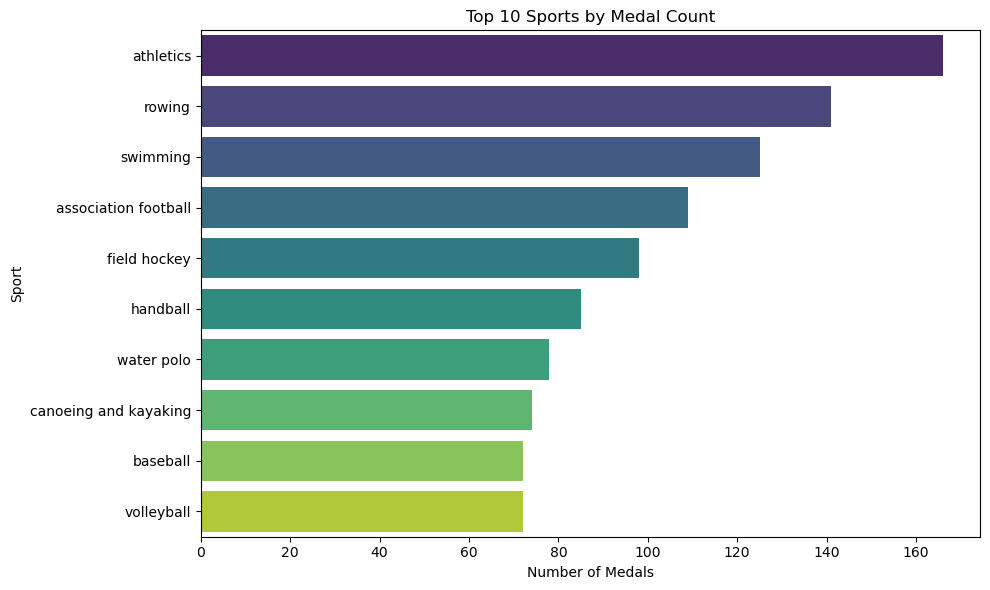

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 10 sports for visualization
top_sports = sport_pivot.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Medal_Count', y='Sport', data=top_sports, palette='viridis')
plt.title('Top 10 Sports by Medal Count')
plt.xlabel('Number of Medals')
plt.ylabel('Sport')
plt.tight_layout()
plt.show()

/var/folders/33/n1nmkmtj1xv10tzmh541ggr80000gn/T/ipykernel_14484/1784620154.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='medal', data=gender_pivot, palette='Set3')


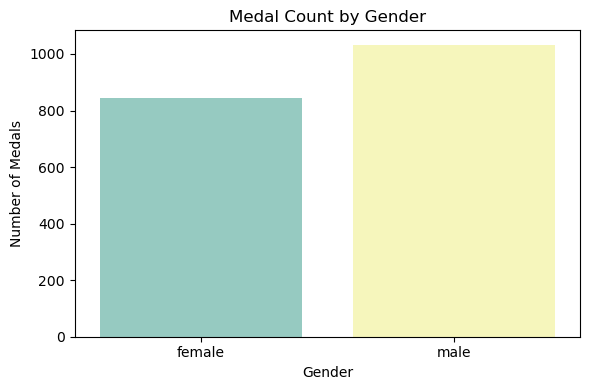

In [11]:
# Create gender medal count
gender_pivot = tidy_df.pivot_table(index='gender',
                                   values='medal',
                                   aggfunc='count').reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='gender', y='medal', data=gender_pivot, palette='Set3')
plt.title('Medal Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Medals')
plt.tight_layout()
plt.show()

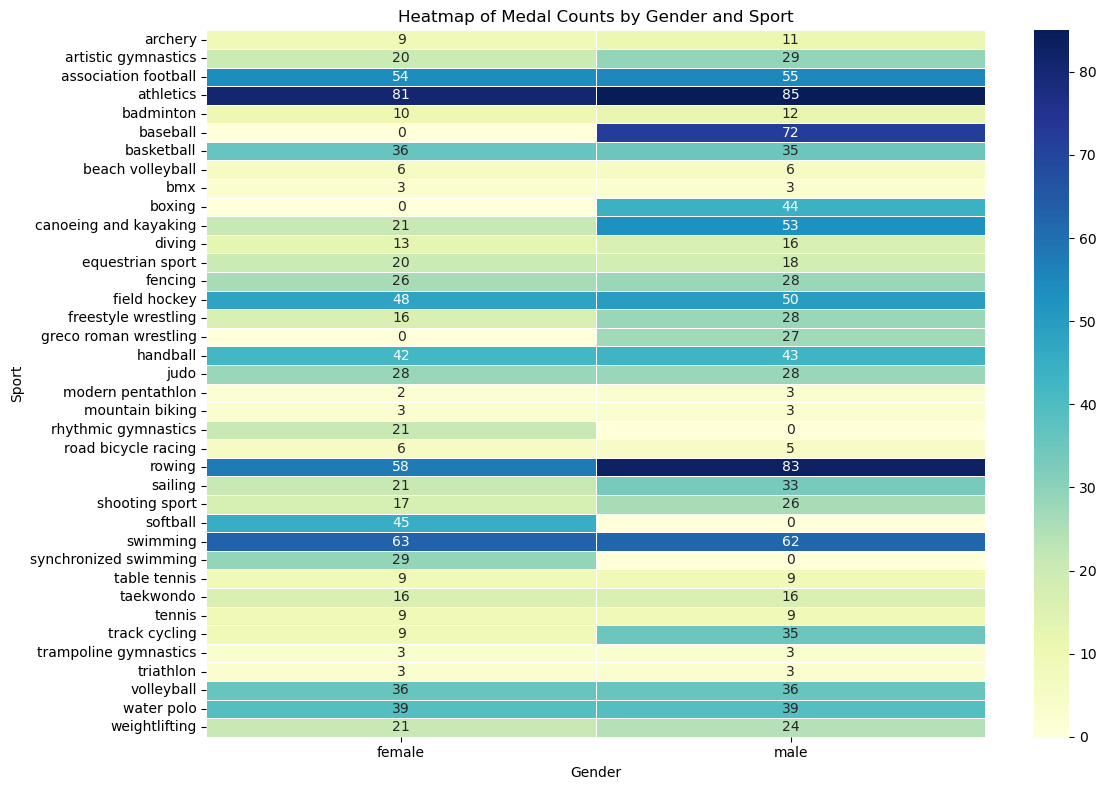

In [12]:
plt.figure(figsize=(12,8))

# Create heatmap from gender_sport_pivot (make sure gender is the columns)
heatmap_data = gender_sport_pivot.set_index('sport')

sns.heatmap(heatmap_data, annot=True, fmt="d", cmap='YlGnBu', linewidths=.5)

plt.title('Heatmap of Medal Counts by Gender and Sport')
plt.xlabel('Gender')
plt.ylabel('Sport')
plt.tight_layout()
plt.show()

/var/folders/33/n1nmkmtj1xv10tzmh541ggr80000gn/T/ipykernel_14484/644112413.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='medal', y='count', data=medal_counts,


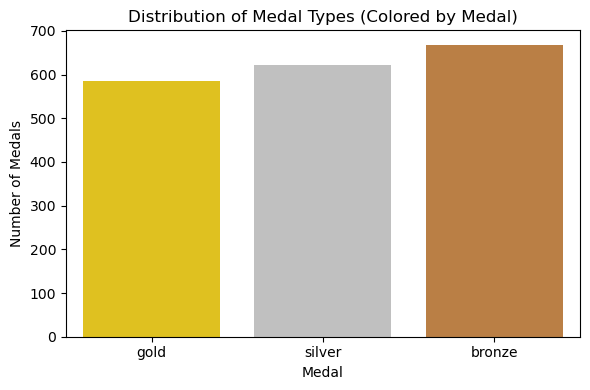

In [13]:
# Define the medal colors
medal_colors = {'gold': '#FFD700', 'silver': '#C0C0C0', 'bronze': '#CD7F32'}

# Ensure correct order
medal_counts = tidy_df['medal'].value_counts().reindex(['gold', 'silver', 'bronze']).reset_index()
medal_counts.columns = ['medal', 'count']

# Plot with custom colors
plt.figure(figsize=(6,4))
sns.barplot(x='medal', y='count', data=medal_counts,
            palette=[medal_colors[medal] for medal in medal_counts['medal']])
plt.title('Distribution of Medal Types (Colored by Medal)')
plt.xlabel('Medal')
plt.ylabel('Number of Medals')
plt.tight_layout()
plt.show()


In [14]:
# Save the pivot table for future reference
sport_pivot.to_csv('medal_counts_by_sport.csv', index=False)